### Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import colorama
from colorama import Fore, Style
from numpy.random import seed
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


&nbsp;

&nbsp;

### Sample Data

In [9]:
x = [1,2,3,5,9,10,11,13,15,16,18,18,19,20,21,23,25,26,27,29,30,34,34,36,37,37,38,40,41,41,42,
     43,44,45,45,45,45,47,48,49,46,47,48,48,50,50,51,53,53,53,54,56,55,55,56,57,57,58,59,60,61,
     63,64,65,66,66,68,70,71,72,74,74,75,77,81,83,84,85,86,87,89,90,90,91,92,95,96,97,150
     ]
len(x)

89

In [14]:
print(x)

[1, 2, 3, 5, 9, 10, 11, 13, 15, 16, 18, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 34, 34, 36, 37, 37, 38, 40, 41, 41, 42, 43, 44, 45, 45, 45, 45, 47, 48, 49, 46, 47, 48, 48, 50, 50, 51, 53, 53, 53, 54, 56, 55, 55, 56, 57, 57, 58, 59, 60, 61, 63, 64, 65, 66, 66, 68, 70, 71, 72, 74, 74, 75, 77, 81, 83, 84, 85, 86, 87, 89, 90, 90, 91, 92, 95, 96, 97, 150]


&nbsp;

&nbsp;

### Visualizing Sample Data

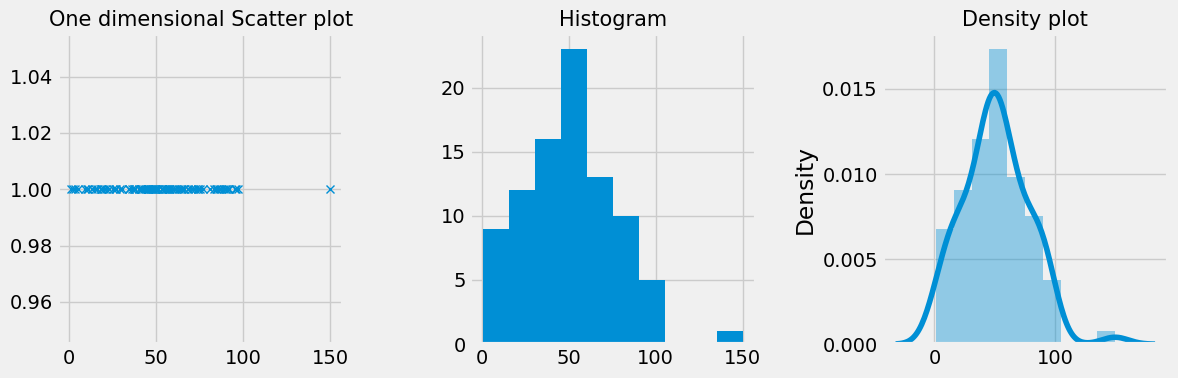

In [10]:
plt.style.use('fivethirtyeight')

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

#One dimensional Scatter plot
axes[0].plot(x, len(x) * [1], "x")
axes[0].set_title('One dimensional Scatter plot', size=15)

#Histogram 
axes[1].hist(x)
axes[1].set_title('Histogram', size=15)

#Density plot(With Normal distribution)
sns.distplot(x, hist=True,ax=axes[2])
axes[2].set_title('Density plot', size=15)

plt.tight_layout()
plt.show()

#### Key Note:
* By analysing data distributions, we can say that given sample data is some what normal distribution.
* But how much it is similar to normal distribution, we be known through statiscal test.
* We can also see there is outlier in given data.
* It is always better to first analyse data distribution through visuals & then go for normal distribution becuase normal tests has some senstivity with high samples size and difficulty for accurate results.

&nbsp;

&nbsp;

### Statistical Normality Test(Shapiro)

In [11]:
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f'%(stat,p))

#Interpreting
alpha = 0.05
if p > 0.05:
    print('Sample looks like gaussian(hypotheised), fail to reject H0')
else:
    print('Sample does not looks like gaussian(hypotheised), fail to reject H0')

Statistics=0.973, p=0.057
Sample looks like gaussian(hypotheised), fail to reject H0


#### Key Note:
* Sahpiro tries too compare given sample x data mean and hypothesied(some automatic calculated correct gaussian mean from data given). And do hypothesis test whether these both mean are nearly same or not.
* That is if shapiro test p_value is < 0.05, means sample mean is very far from hypothesied mean and getting into critical region in population distribution i.e., hypothesied gaussian distribution . So we reject null hypothesis(i.e., Given sample data is not normally/gaussian distributed).
* Here p_value is > 0.05 i.e., 0.057(So sample mean and hypotheised gaussian means are nearly same to each other in hypothesied gaussian distribution)
* This is my understanding based hypothesis test knowledge.

&nbsp;

&nbsp;

### Anomaly Detection(using 3 Standard Devition, it works only if data is normally distributed)
* Our sample data here, is normally distributed

In [12]:
df = pd.DataFrame({'Age':x})

mean = round(df['Age'].mean(),2)
var = round((sum(pow(x-mean,2) for x in df['Age']) / (len(df['Age']))),2)
stdev = round(math.sqrt(var),2)

print('Mean =',mean,'\n')
print('Var =',var,'\n')
print('Stdev =',stdev,'\n')
print('Stdev*3 =',stdev*3,'\n')
print('abs(150 - mean) =',round(abs(150 - mean),3),'\n')

df['Age_Anomaly_Indic'] = ['Yes' if abs(x - mean) > stdev*3 else 'No' for x in df['Age']]
print(Fore.RED + '='*30)
print('Anomalies in our sample data :')
print('='*30)
print(df[df['Age_Anomaly_Indic']=='Yes'][['Age','Age_Anomaly_Indic']])

Mean = 51.24 

Var = 726.43 

Stdev = 26.95 

Stdev*3 = 80.85 

abs(150 - mean) = 98.76 

Anomalies in our sample data :
    Age Age_Anomaly_Indic
88  150               Yes


#### Key Note:
* In our sample data, observation point 150 has difference from its mean is 98.76, which is greater than > 3*stdev.
* It means our observation point 150 is more than 3 stdev far from its mean, in hypothesis testing sample mean > 3.stdev (z>=3) enters into critical region(very less probable or unlikely to happen region in normal distribution).
* So, 150 entering into critical region or less probable region, so it is prone to be an outlier (or) anomaly compared, other observations point.